### The Sparks Foundation - Data Science and Business Analytics 
#### Author - Ritik Malarya
#### Task - Predict the percentage of an student based on the no. of study hours


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")


##### Data Analysis

In [3]:
#reading first five data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#check shape of the datatset

df.shape

(25, 2)

In [5]:
#checking is there any null or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

##### Data Visualization

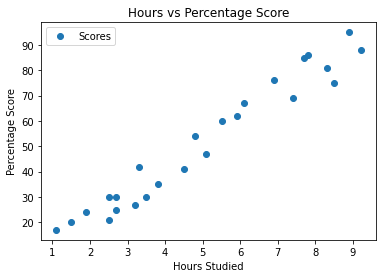

In [9]:
df.plot(x ='Hours', y ='Scores' , style='o')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### There is a linear relationship between ' Number of hours' and 'Score'. So we can use the Linear Regression Supervised ML model.

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


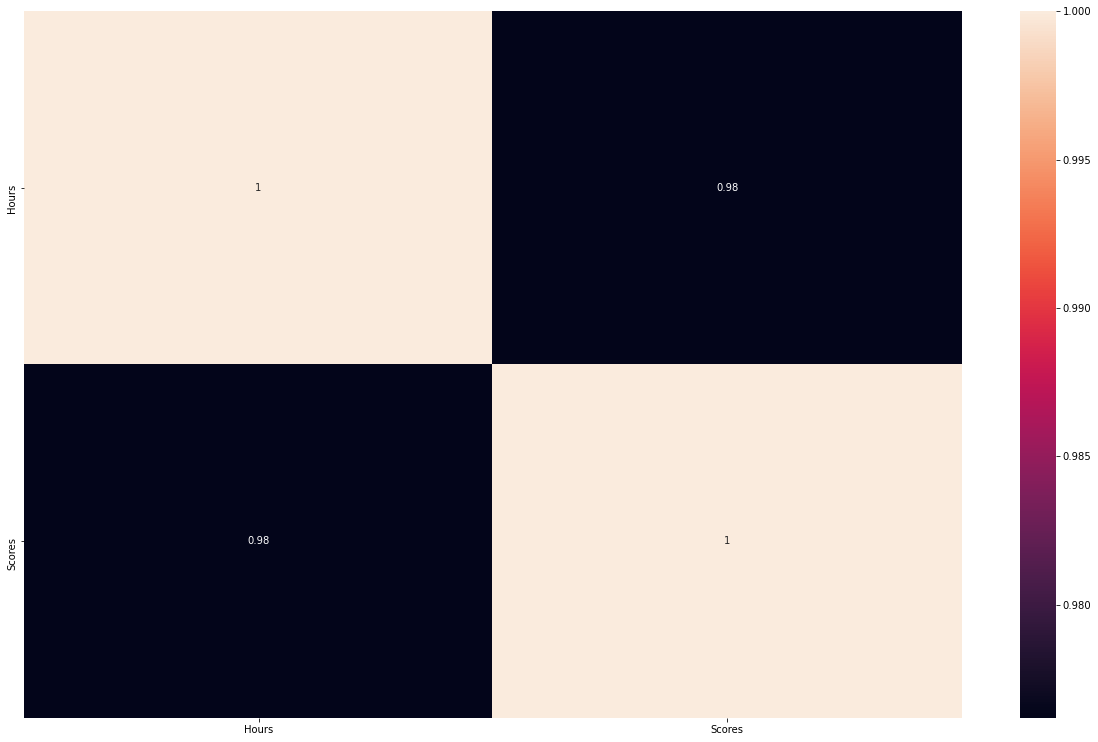

In [11]:
#Heat map 
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [12]:
x = df.iloc[: , :-1]
x.values


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y = df.iloc[: , 1:]
y.values

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split

##### Spliting datatset into training & test 

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=0)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(5, 1)
(20, 1)
(5, 1)
(5, 1)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

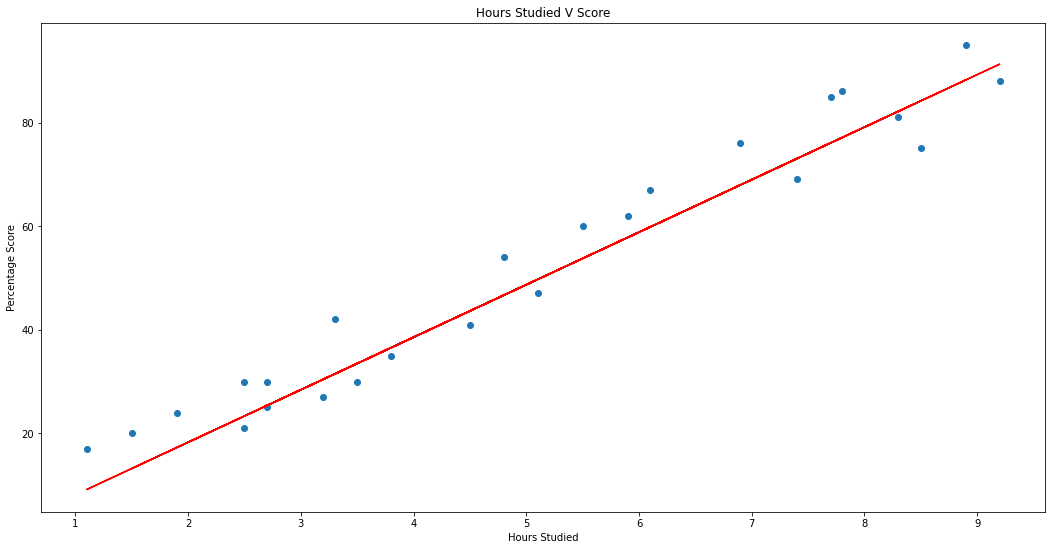

In [19]:
##        Regressor LIne
plt.figure(figsize=(18,9))
line = lr.coef_*x + lr.intercept_
plt.scatter(x, y)
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(x, line , label = 'Line of best fit' , color = 'r')
plt.show()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
print('Accuracy of the model :',lr.score(x_test , y_test)*100)

Accuracy of the model : 93.86284428707806


In [22]:
print("Training Score:", lr.score(x_train,y_train)*100)
print("Testing Score:", lr.score(x_test,y_test)*100)

Training Score: 94.10568286232362
Testing Score: 93.86284428707806


##### Plotting no.of hours vs percentage scored on train data

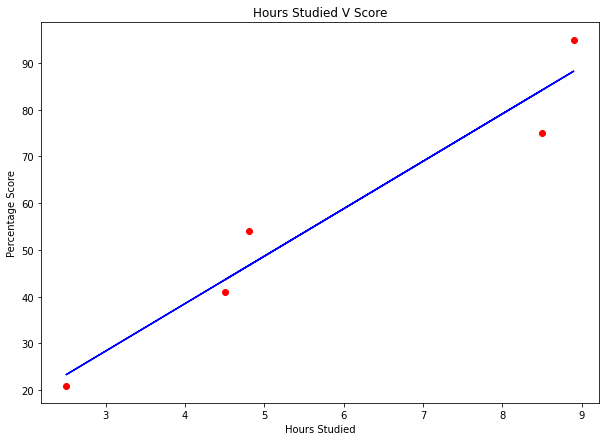

In [23]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### Plotting no.of hours vs percentage scored on test data

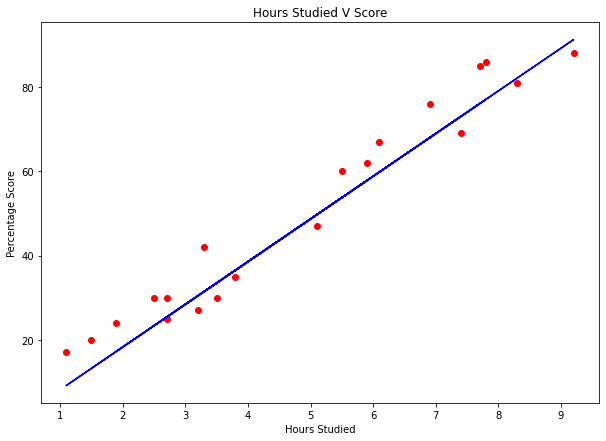

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,color='red');
plt.plot(x_test,y_pred,color='blue')
plt.title('Hours Studied V Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()


#### Prediction : 
  Predict the percentage score if the Student studied for 9.25 hours

In [25]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
prediction = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print()
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25

Predicted Score = [91.77448149]


##### Conclusion: if the student studies for 9.25 hours , his/her percentage score would be 91.77